In [1]:
import numpy as np
import QuasarModelFunctions as QMF
import Amoeba
from astropy.io import fits
import astropy.constants as const
import astropy.units as u
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter
from skimage.transform import rescale
import astropy.nddata
import glob
plt.style.use("plot_style_large_font.txt")

<ipython-input-2-855d8e35a122>:34: RuntimeWarning: divide by zero encountered in log10
  conts3 = ax[2].contourf(R, Z, np.log10(testingBLR.density_grid.T), 20)


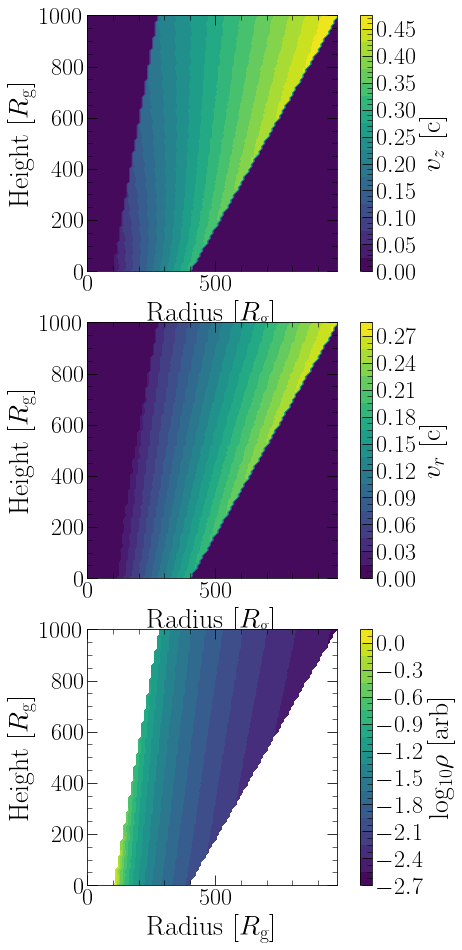

In [2]:
zmax = 1000 # R_g
mexp = 8.0
sl_1_rlaunch = 100 # R_g
sl_2_rlaunch = 400
sl_1_theta = 10 # deg
sl_2_theta = 30
sl_1_char_dist = 1000 # R_g
sl_2_char_dist = 400 
sl_1_asy_vel = 0.4 # v/c
sl_2_asy_vel = 0.7

testingBLR = Amoeba.BroadLineRegion(mexp, zmax, r_res=10)


SL1 = Amoeba.Streamline(sl_1_rlaunch, sl_1_theta, zmax, sl_1_char_dist, mexp, sl_1_asy_vel)
SL2 = Amoeba.Streamline(sl_2_rlaunch, sl_2_theta, zmax, sl_2_char_dist, mexp, sl_2_asy_vel)

testingBLR.Add_SL_bounded_region(SL1, SL2)
R, Z = np.meshgrid(testingBLR.r_vals, testingBLR.z_vals)

fig, ax = plt.subplots(3, figsize=(8, 16))
conts = ax[0].contourf(R, Z, (testingBLR.z_velocity_grid.T), 20)
ax[1].set_xlabel(r"Radius [$R_{\rm g}$]")
ax[0].set_ylabel(r"Height [$R_{\rm g}$]")
ax[1].set_ylabel(r"Height [$R_{\rm g}$]")
ax[2].set_ylabel(r"Height [$R_{\rm g}$]")
cbar = plt.colorbar(conts, ax=ax[0], label=r'$v_{z}$ [c]')

conts2 = ax[1].contourf(R, Z, (testingBLR.r_velocity_grid.T), 20)
ax[2].set_xlabel(r"Radius [$R_{\rm g}$]")
cbar2 = plt.colorbar(conts2, ax=ax[1], label=r'$v_{r}$ [c]')


conts3 = ax[2].contourf(R, Z, np.log10(testingBLR.density_grid.T), 20)
ax[0].set_xlabel(r"Radius [$R_{\rm g}$]")
cbar3 = plt.colorbar(conts3, ax=ax[2], label=r'log$_{10} \rho$ [arb]')
ax[0].set_aspect(1)
ax[1].set_aspect(1)
ax[2].set_aspect(1)
plt.show()

<ipython-input-3-0c35189519e0>:13: RuntimeWarning: divide by zero encountered in log10
  ax.contourf(x_vals, y_vals, np.log10(projection))


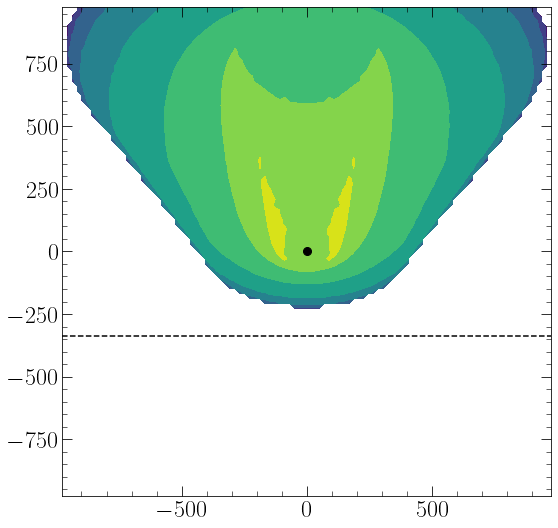

In [3]:
inc_ang = 55
projection = testingBLR.Project_BLR_density(inc_ang)
inc_ang *= np.pi/180
x_vals = np.linspace(-testingBLR.max_r, testingBLR.max_r, np.size(projection, 0))
y_vals = np.linspace(-testingBLR.max_r, testingBLR.max_r, np.size(projection, 1))

baseline = (10+sl_2_rlaunch)*np.sin(inc_ang)

fig, ax = plt.subplots(figsize=(10,9))
ax.plot([0], [0], 'k.', markersize=16)
ax.plot([-testingBLR.max_r,testingBLR.max_r], [-baseline,-baseline], 'k--', markersize=1) 
    # Once inc_ang > SL2_theta, BLR should be above this line!
ax.contourf(x_vals, y_vals, np.log10(projection))
ax.set_aspect(1)
plt.show()

<ipython-input-4-0070313459ef>:7: RuntimeWarning: divide by zero encountered in log10
  contours = ax.contourf(x_vals, y_vals, np.log10(rescaled_projection), 40)


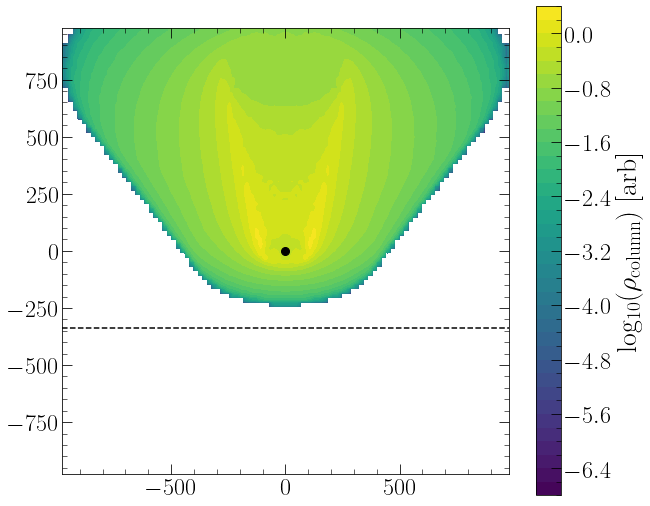

In [4]:
rescaled_projection = rescale(projection, 30)
x_vals = np.linspace(-testingBLR.max_r, testingBLR.max_r, np.size(rescaled_projection, 0))
y_vals = np.linspace(-testingBLR.max_r, testingBLR.max_r, np.size(rescaled_projection, 1))
fig, ax = plt.subplots(figsize=(10,9))
ax.plot([0], [0], 'k.', markersize=16)
ax.plot([-testingBLR.max_r,testingBLR.max_r], [-(10+sl_2_rlaunch)*np.sin(inc_ang),-(10+sl_2_rlaunch)*np.sin(inc_ang)], 'k--', markersize=1)
contours = ax.contourf(x_vals, y_vals, np.log10(rescaled_projection), 40)
cbar = plt.colorbar(contours, ax=ax, label = r"log$_{10} (\rho_{\rm{column}})$  [arb]")
ax.set_aspect(1)
plt.show()

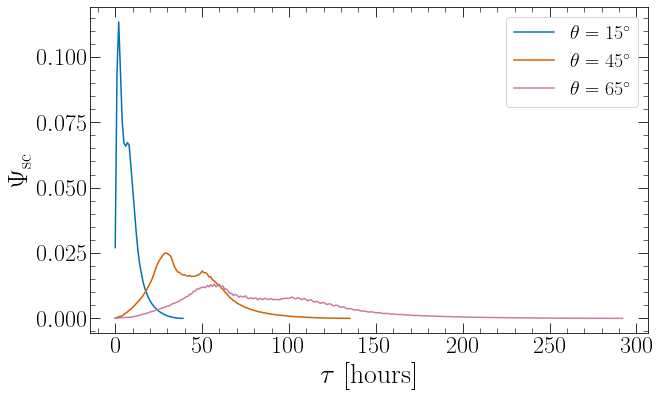

In [5]:
theta1 = 15
theta2 = 45
theta3 = 65

TF1 = testingBLR.Scattering_BLR_TF(theta1, scaleratio=15)
TF2 = testingBLR.Scattering_BLR_TF(theta2, scaleratio=15)
TF3 = testingBLR.Scattering_BLR_TF(theta3, scaleratio=15)

fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(TF1, label=r'$\theta = '+str(theta1)+r"^{\circ}$")
ax.plot(TF2, label=r'$\theta = '+str(theta2)+r"^{\circ}$")
ax.plot(TF3, label=r'$\theta = '+str(theta3)+r"^{\circ}$")

ax.set_xlabel(r"$\tau$ [hours]")
ax.set_ylabel(r"$\Psi_{\rm{sc}}$")
ax.legend()

plt.show()

In [6]:
vel_centroid = -0.2   # units c
delta_vel = 0.2       # +/- units c
inc_ang = 45          # deg

vel_slice = testingBLR.Project_BLR_velocity_slice(inc_ang, vel_centroid, delta_vel)

/usr/local/lib/python3.9/site-packages/astropy/units/quantity.py:479: RuntimeWarning: divide by zero encountered in true_divide
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)


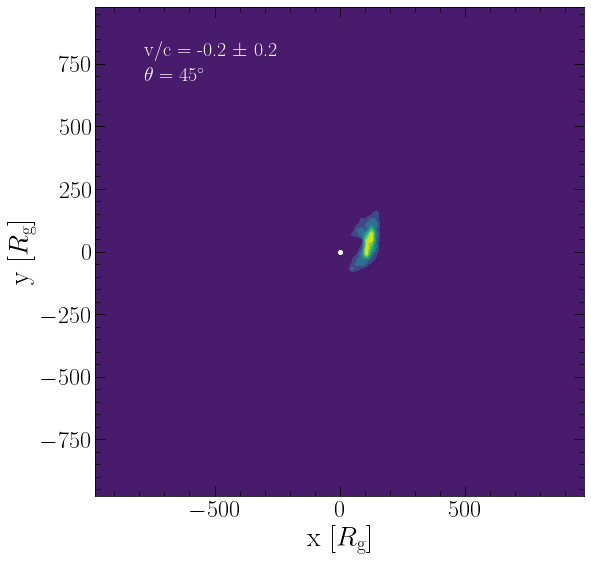

In [7]:
rescale_vel_slice = rescale(vel_slice, 30)
fig, ax = plt.subplots(figsize=(10,9))
ax.contourf(x_vals, y_vals, rescale_vel_slice)
ax.plot([0],[0], 'w.-', markersize=8)
ax.set_xlabel(r"x [$R_{\rm{g}}$]")
ax.set_ylabel(r"y [$R_{\rm{g}}$]")

ax.text(-0.8*np.max(x_vals), 0.8*np.max(y_vals), r"v/c = "+str(vel_centroid)+r" $\pm$ "+ str(delta_vel), color='white', fontsize=20)
ax.text(-0.8*np.max(x_vals), 0.7*np.max(y_vals), r"$\theta = "+str(inc_ang)+r"^{\circ}$ ", color='white', fontsize=20)
ax.set_aspect(1)
plt.show()


Adding another BLR region will overwrite anything it overlaps, but they are added to the existing r,z grids. First we will extend a grid with a second region that touches the first.

<ipython-input-8-59765fe1eced>:34: RuntimeWarning: divide by zero encountered in log10
  conts3 = ax[2].contourf(R, Z, np.log10(testingBLR.density_grid.T), 20)


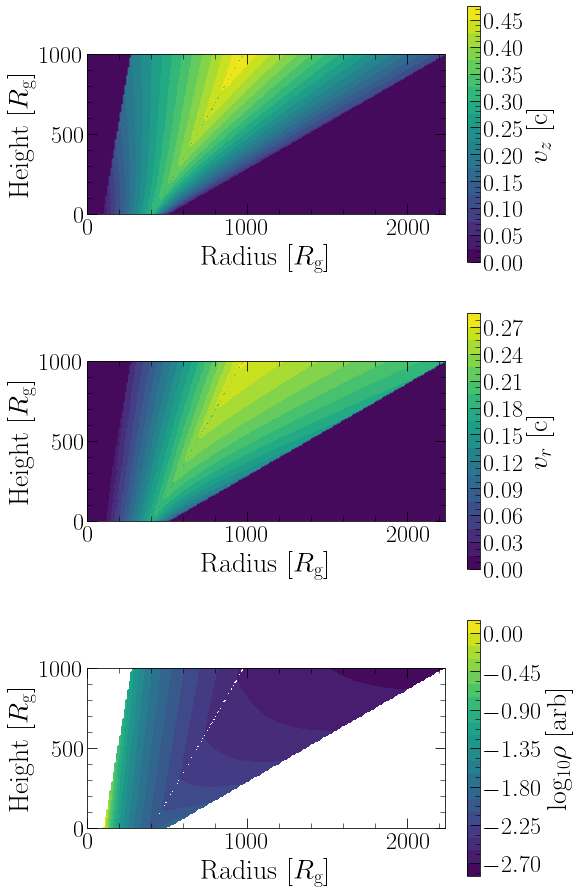

In [8]:
zmax = 1000 # R_g
mexp = 8.0

sl_3_rlaunch = 500
sl_3_theta = 60
sl_3_char_dist = 1000
sl_3_asy_vel = 0.3

testingBLR = Amoeba.BroadLineRegion(mexp, zmax, r_res=10)


SL1 = Amoeba.Streamline(sl_1_rlaunch, sl_1_theta, zmax, sl_1_char_dist, mexp, sl_1_asy_vel)
SL2 = Amoeba.Streamline(sl_2_rlaunch, sl_2_theta, zmax, sl_2_char_dist, mexp, sl_2_asy_vel)
SL3 = Amoeba.Streamline(sl_3_rlaunch, sl_3_theta, zmax, sl_3_char_dist, mexp, sl_3_asy_vel)

testingBLR.Add_SL_bounded_region(SL1, SL2)
testingBLR.Add_SL_bounded_region(SL2, SL3)

R, Z = np.meshgrid(testingBLR.r_vals, testingBLR.z_vals)

fig, ax = plt.subplots(3, figsize=(8, 16))
conts = ax[0].contourf(R, Z, (testingBLR.z_velocity_grid.T), 20)
ax[1].set_xlabel(r"Radius [$R_{\rm g}$]")
ax[0].set_ylabel(r"Height [$R_{\rm g}$]")
ax[1].set_ylabel(r"Height [$R_{\rm g}$]")
ax[2].set_ylabel(r"Height [$R_{\rm g}$]")
cbar = plt.colorbar(conts, ax=ax[0], label=r'$v_{z}$ [c]')

conts2 = ax[1].contourf(R, Z, (testingBLR.r_velocity_grid.T), 20)
ax[2].set_xlabel(r"Radius [$R_{\rm g}$]")
cbar2 = plt.colorbar(conts2, ax=ax[1], label=r'$v_{r}$ [c]')


conts3 = ax[2].contourf(R, Z, np.log10(testingBLR.density_grid.T), 20)
ax[0].set_xlabel(r"Radius [$R_{\rm g}$]")
cbar3 = plt.colorbar(conts3, ax=ax[2], label=r'log$_{10} \rho$ [arb]')
ax[0].set_aspect(1)
ax[1].set_aspect(1)
ax[2].set_aspect(1)
plt.show()

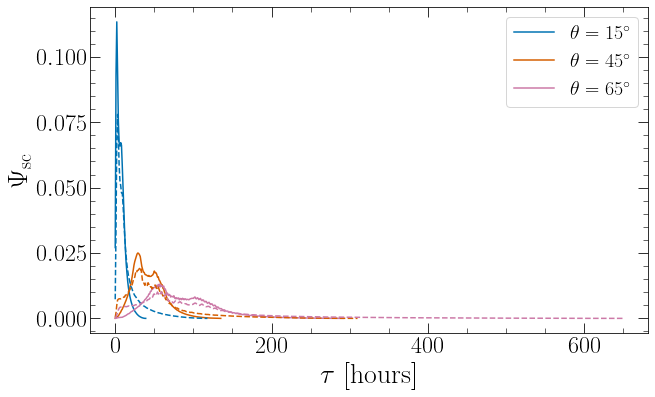

In [9]:
TF1_extra = testingBLR.Scattering_BLR_TF(theta1, scaleratio=15)
TF2_extra = testingBLR.Scattering_BLR_TF(theta2, scaleratio=15)
TF3_extra = testingBLR.Scattering_BLR_TF(theta3, scaleratio=15)

fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(TF1, label=r'$\theta = '+str(theta1)+r"^{\circ}$")
ax.plot(TF2, label=r'$\theta = '+str(theta2)+r"^{\circ}$")
ax.plot(TF3, label=r'$\theta = '+str(theta3)+r"^{\circ}$")

plt.gca().set_prop_cycle(None) #reset color cycle
ax.plot(TF1_extra, "--")       #add new TFs to plot as dashed lines
ax.plot(TF2_extra, "--")
ax.plot(TF3_extra, "--")

ax.set_xlabel(r"$\tau$ [hours]")
ax.set_ylabel(r"$\Psi_{\rm{sc}}$")
ax.legend()

plt.show()

If we instead use the boundaries of SL1 and SL3, we get the following...

<ipython-input-10-8d70a4f0cc01>:19: RuntimeWarning: divide by zero encountered in log10
  conts3 = ax[2].contourf(R, Z, np.log10(alt_BLR.density_grid.T), 20)


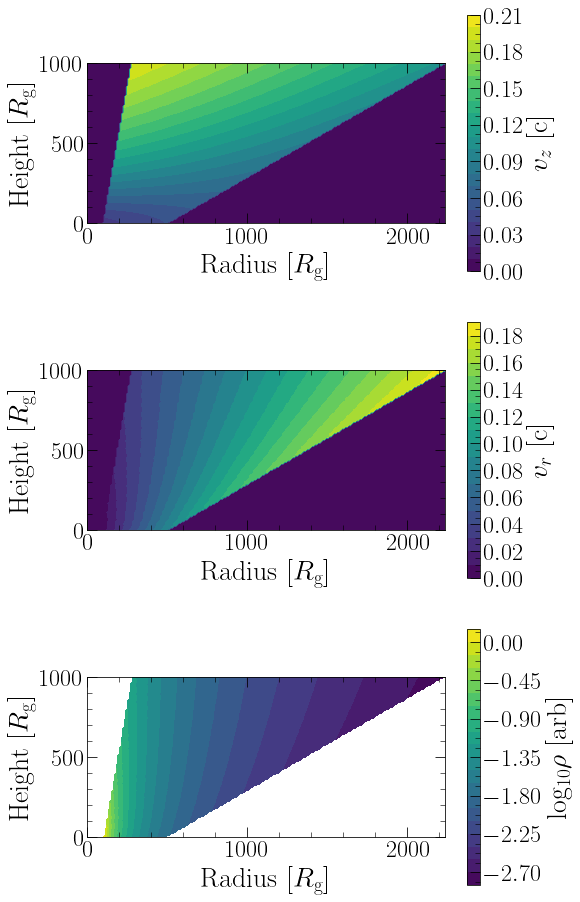

In [10]:
alt_BLR = Amoeba.BroadLineRegion(mexp, zmax, r_res=10)
alt_BLR.Add_SL_bounded_region(SL1, SL3)

R, Z = np.meshgrid(alt_BLR.r_vals, alt_BLR.z_vals)

fig, ax = plt.subplots(3, figsize=(8, 16))
conts = ax[0].contourf(R, Z, (alt_BLR.z_velocity_grid.T), 20)
ax[1].set_xlabel(r"Radius [$R_{\rm g}$]")
ax[0].set_ylabel(r"Height [$R_{\rm g}$]")
ax[1].set_ylabel(r"Height [$R_{\rm g}$]")
ax[2].set_ylabel(r"Height [$R_{\rm g}$]")
cbar = plt.colorbar(conts, ax=ax[0], label=r'$v_{z}$ [c]')

conts2 = ax[1].contourf(R, Z, (alt_BLR.r_velocity_grid.T), 20)
ax[2].set_xlabel(r"Radius [$R_{\rm g}$]")
cbar2 = plt.colorbar(conts2, ax=ax[1], label=r'$v_{r}$ [c]')


conts3 = ax[2].contourf(R, Z, np.log10(alt_BLR.density_grid.T), 20)
ax[0].set_xlabel(r"Radius [$R_{\rm g}$]")
cbar3 = plt.colorbar(conts3, ax=ax[2], label=r'log$_{10} \rho$ [arb]')
ax[0].set_aspect(1)
ax[1].set_aspect(1)
ax[2].set_aspect(1)
plt.show()


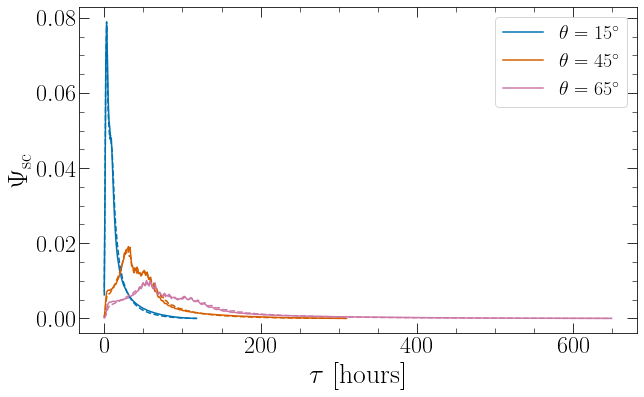

In [11]:
TF1_alt = alt_BLR.Scattering_BLR_TF(theta1, scaleratio=15)
TF2_alt = alt_BLR.Scattering_BLR_TF(theta2, scaleratio=15)
TF3_alt = alt_BLR.Scattering_BLR_TF(theta3, scaleratio=15)

fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(TF1_extra, label=r'$\theta = '+str(theta1)+r"^{\circ}$")
ax.plot(TF2_extra, label=r'$\theta = '+str(theta2)+r"^{\circ}$")
ax.plot(TF3_extra, label=r'$\theta = '+str(theta3)+r"^{\circ}$")

plt.gca().set_prop_cycle(None) #reset color cycle
ax.plot(TF1_alt, "--")       #add new TFs to plot as dashed lines
ax.plot(TF2_alt, "--")
ax.plot(TF3_alt, "--")

ax.set_xlabel(r"$\tau$ [hours]")
ax.set_ylabel(r"$\Psi_{\rm{sc}}$")
ax.legend()

plt.show()

This may not look different as $\Psi$ was calculated using a density proxy, proportional to $v_{\rm{poloidal}}^{-1} r^{-1}$. Comparing velocity slices can be used to model broad lines leaking into an observational filter, and show a different story.

/usr/local/lib/python3.9/site-packages/astropy/units/quantity.py:479: RuntimeWarning: divide by zero encountered in true_divide
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)


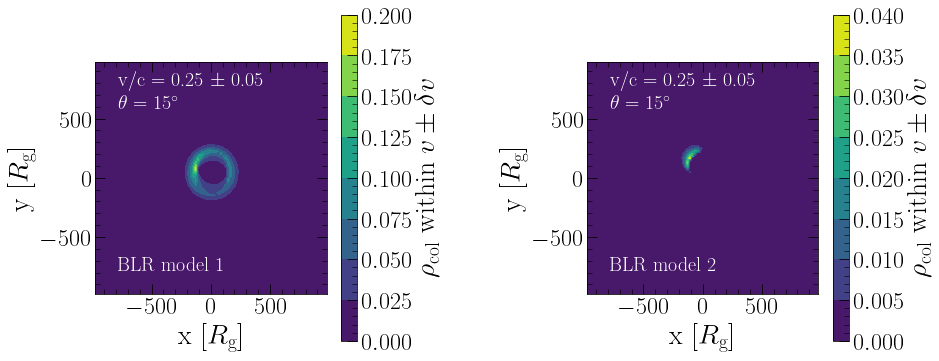

In [12]:
vel_centroid = 0.25 # units c
delta_vel = 0.05 # +/- units c
inc_ang = 15     # deg

vel_slice_1 = testingBLR.Project_BLR_velocity_slice(inc_ang, vel_centroid, delta_vel)
vel_slice_2 = alt_BLR.Project_BLR_velocity_slice(inc_ang, vel_centroid, delta_vel)

rescale_vel_slice_1 = rescale(vel_slice_1, 30)
rescale_vel_slice_2 = rescale(vel_slice_2, 30)

fig, ax = plt.subplots(1, 2, figsize=(14,6))
contours1 = ax[0].contourf(x_vals, y_vals, rescale_vel_slice_1)
contours2 = ax[1].contourf(x_vals, y_vals, rescale_vel_slice_2)
plt.colorbar(contours1, ax=ax[0], label=r"$\rho_{\rm{col}}$ within $v \pm \delta v$")
plt.colorbar(contours2, ax=ax[1], label=r"$\rho_{\rm{col}}$ within $v \pm \delta v$")

for axis in ax:
    axis.set_xlabel(r"x [$R_{\rm{g}}$]")
    axis.set_ylabel(r"y [$R_{\rm{g}}$]")
    axis.set_aspect(1)

ax[0].text(-0.8*np.max(x_vals), 0.8*np.max(y_vals), r"v/c = "+str(vel_centroid)+r" $\pm$ "+ str(delta_vel), color='white', fontsize=20)
ax[0].text(-0.8*np.max(x_vals), 0.6*np.max(y_vals), r"$\theta = "+str(inc_ang)+r"^{\circ}$ ", color='white', fontsize=20)
ax[1].text(-0.8*np.max(x_vals), 0.8*np.max(y_vals), r"v/c = "+str(vel_centroid)+r" $\pm$ "+ str(delta_vel), color='white', fontsize=20)
ax[1].text(-0.8*np.max(x_vals), 0.6*np.max(y_vals), r"$\theta = "+str(inc_ang)+r"^{\circ}$ ", color='white', fontsize=20)

ax[0].text(-0.8*np.max(x_vals), -0.8*np.max(y_vals), "BLR model 1", color='white', fontsize=20)
ax[1].text(-0.8*np.max(x_vals), -0.8*np.max(y_vals), "BLR model 2", color='white', fontsize=20)


plt.subplots_adjust(wspace=0.7)
plt.show()

Now making a more complex BLR geometry...

<ipython-input-13-ff0938485996>:48: RuntimeWarning: divide by zero encountered in log10
  conts3 = ax[2].contourf(R, Z, np.log10(comp_BLR.density_grid.T), 20)


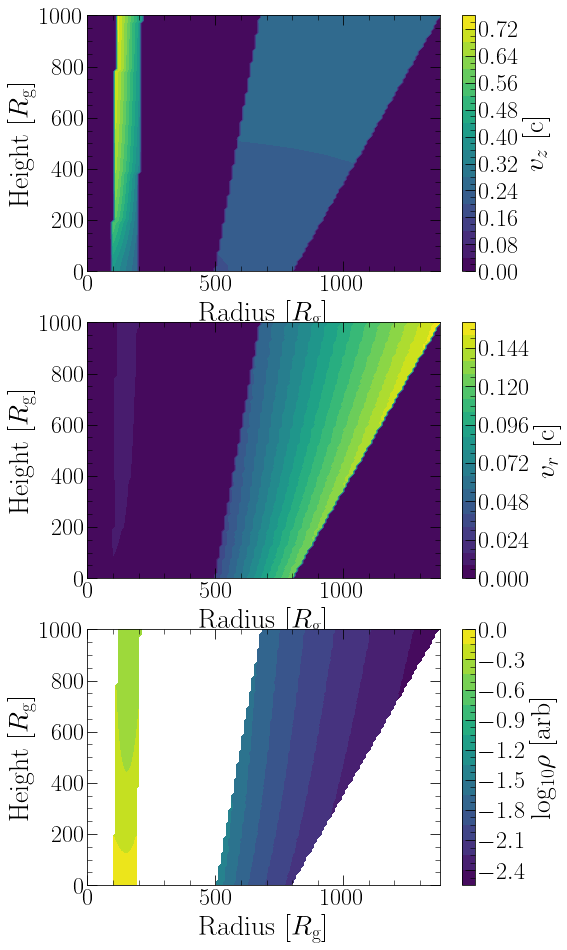

In [13]:
zmax = 1000 # R_g
mexp = 8.0
sl1_rlaunch = 100 # R_g
sl2_rlaunch = 200
sl1_theta = 1 # deg
sl2_theta = 1
sl1_char_dist = 100 # R_g
sl2_char_dist = 200 
sl1_asy_vel = 0.8 # v/c
sl2_asy_vel = 0.5

sl3_rlaunch = 500 # R_g
sl4_rlaunch = 800
sl3_theta = 10 # deg
sl4_theta = 30
sl3_char_dist = 500 # R_g
sl4_char_dist = 500 
sl3_asy_vel = 0.4 # v/c
sl4_asy_vel = 0.4



comp_BLR = Amoeba.BroadLineRegion(mexp, zmax, r_res=10)

SL1 = Amoeba.Streamline(sl1_rlaunch, sl1_theta, zmax, sl1_char_dist, mexp, sl1_asy_vel)
SL2 = Amoeba.Streamline(sl2_rlaunch, sl2_theta, zmax, sl2_char_dist, mexp, sl2_asy_vel)
SL3 = Amoeba.Streamline(sl3_rlaunch, sl3_theta, zmax, sl3_char_dist, mexp, sl3_asy_vel)
SL4 = Amoeba.Streamline(sl4_rlaunch, sl4_theta, zmax, sl4_char_dist, mexp, sl4_asy_vel)

comp_BLR.Add_SL_bounded_region(SL1, SL2)
comp_BLR.Add_SL_bounded_region(SL3, SL4)

R, Z = np.meshgrid(comp_BLR.r_vals, comp_BLR.z_vals)

fig, ax = plt.subplots(3, figsize=(8, 16))
conts = ax[0].contourf(R, Z, (comp_BLR.z_velocity_grid.T), 20)
ax[1].set_xlabel(r"Radius [$R_{\rm g}$]")
ax[0].set_ylabel(r"Height [$R_{\rm g}$]")
ax[1].set_ylabel(r"Height [$R_{\rm g}$]")
ax[2].set_ylabel(r"Height [$R_{\rm g}$]")
cbar = plt.colorbar(conts, ax=ax[0], label=r'$v_{z}$ [c]')

conts2 = ax[1].contourf(R, Z, (comp_BLR.r_velocity_grid.T), 20)
ax[2].set_xlabel(r"Radius [$R_{\rm g}$]")
cbar2 = plt.colorbar(conts2, ax=ax[1], label=r'$v_{r}$ [c]')


conts3 = ax[2].contourf(R, Z, np.log10(comp_BLR.density_grid.T), 20)
ax[0].set_xlabel(r"Radius [$R_{\rm g}$]")
cbar3 = plt.colorbar(conts3, ax=ax[2], label=r'log$_{10} \rho$ [arb]')
ax[0].set_aspect(1)
ax[1].set_aspect(1)
ax[2].set_aspect(1)
plt.show()

<ipython-input-14-75c608789f9d>:9: RuntimeWarning: divide by zero encountered in log10
  contours = ax.contourf(x_vals, y_vals, np.log10(projection),20)


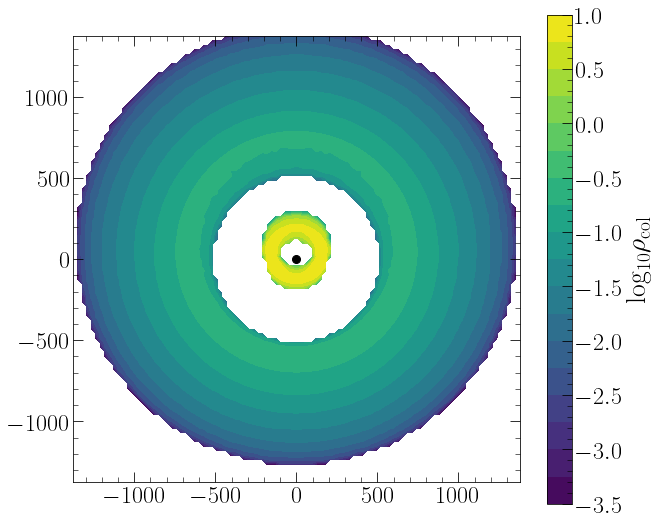

In [14]:
inc_ang = 5
projection = comp_BLR.Project_BLR_density(inc_ang)
inc_ang *= np.pi/180
x_vals = np.linspace(-comp_BLR.max_r, comp_BLR.max_r, np.size(projection, 0))
y_vals = np.linspace(-comp_BLR.max_r, comp_BLR.max_r, np.size(projection, 1))

fig, ax = plt.subplots(figsize=(10,9))
ax.plot([0], [0], 'k.', markersize=16)
contours = ax.contourf(x_vals, y_vals, np.log10(projection),20)
cbar = plt.colorbar(contours, ax=ax, label=r"log$_{10}\rho_{\rm{col}}$")
ax.set_aspect(1)
plt.show()

<ipython-input-15-29784f0257e3>:9: RuntimeWarning: divide by zero encountered in log10
  contours = ax.contourf(x_vals, y_vals, np.log10(projection),20)


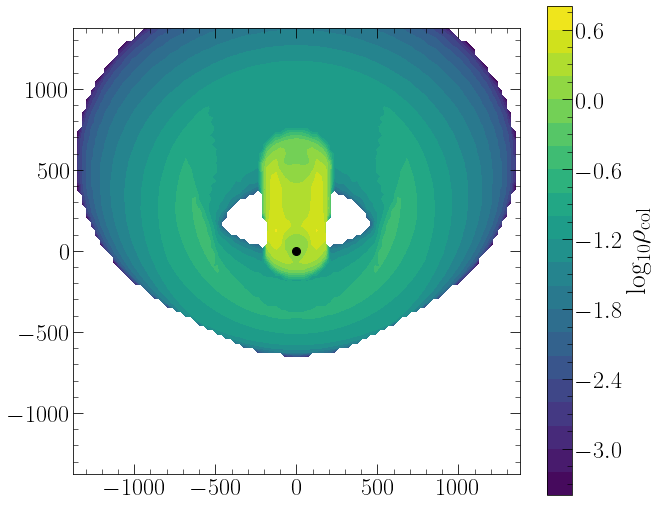

In [15]:
inc_ang = 35
projection = comp_BLR.Project_BLR_density(inc_ang)
inc_ang *= np.pi/180
x_vals = np.linspace(-comp_BLR.max_r, comp_BLR.max_r, np.size(projection, 0))
y_vals = np.linspace(-comp_BLR.max_r, comp_BLR.max_r, np.size(projection, 1))

fig, ax = plt.subplots(figsize=(10,9))
ax.plot([0], [0], 'k.', markersize=16)
contours = ax.contourf(x_vals, y_vals, np.log10(projection),20)
cbar = plt.colorbar(contours, ax=ax, label=r"log$_{10}\rho_{\rm{col}}$")
ax.set_aspect(1)
plt.show()

<ipython-input-16-2d73e3ac773f>:9: RuntimeWarning: divide by zero encountered in log10
  contours = ax.contourf(x_vals, y_vals, np.log10(projection),20)


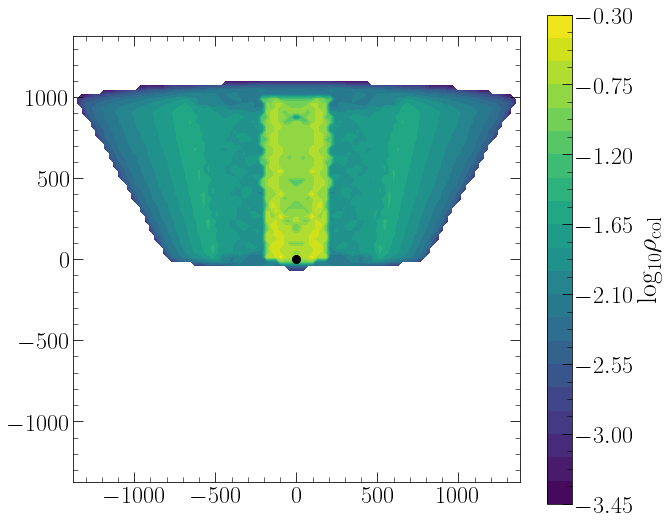

In [16]:
inc_ang = 85
projection = comp_BLR.Project_BLR_density(inc_ang)
inc_ang *= np.pi/180
x_vals = np.linspace(-comp_BLR.max_r, comp_BLR.max_r, np.size(projection, 0))
y_vals = np.linspace(-comp_BLR.max_r, comp_BLR.max_r, np.size(projection, 1))

fig, ax = plt.subplots(figsize=(10,9))
ax.plot([0], [0], 'k.', markersize=16)
contours = ax.contourf(x_vals, y_vals, np.log10(projection),20)
cbar = plt.colorbar(contours, ax=ax, label=r"log$_{10}\rho_{\rm{col}}$")
ax.set_aspect(1)
plt.show()

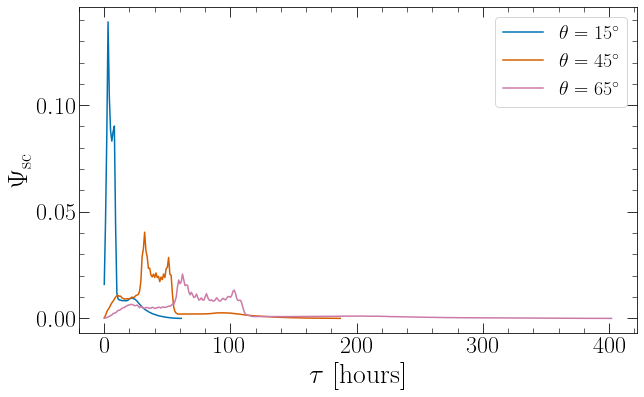

In [18]:
TF1_comp = comp_BLR.Scattering_BLR_TF(theta1, scaleratio=15)
TF2_comp = comp_BLR.Scattering_BLR_TF(theta2, scaleratio=15)
TF3_comp = comp_BLR.Scattering_BLR_TF(theta3, scaleratio=15)

fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(TF1_comp, label=r'$\theta = '+str(theta1)+r"^{\circ}$")
ax.plot(TF2_comp, label=r'$\theta = '+str(theta2)+r"^{\circ}$")
ax.plot(TF3_comp, label=r'$\theta = '+str(theta3)+r"^{\circ}$")


ax.set_xlabel(r"$\tau$ [hours]")
ax.set_ylabel(r"$\Psi_{\rm{sc}}$")
ax.legend()

plt.show()